In [ ]:
# autoencoder 就是從大影像萃取出重要特徵 具備有從該萃取出來的精華向量 反推出原來的圖形

# tf : 1.x tensorflow 
# tf : 2.* tensorflow : ValueError: None values not supported. remove : epsilon=None parameter
#  

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras import optimizers

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
# 產生編碼後的重要向量 就是一沙一世界的沙
import numpy as np

temp = []
for img in x_train:
    t = []
    for row in img:
        for i in row:
            t.append(i)
    temp.append(t)
x_train = []
x_train = temp

x_train = np.array(x_train)

x_train = x_train.reshape(60000,784)

#以上僅是將所有數據變平化

model = Sequential()
model.add(Dense(784,activation='relu',input_shape=(784,)  ))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(784,activation='relu'))
# 採用類似迴歸分析 mse , epsilon=None
model.compile(loss=keras.losses.mean_squared_error,
             optimizer=optimizers.RMSprop(learning_rate=0.0001, rho=0.9, decay=0.0),
             metrics = ['accuracy'])

history = model.fit(x_train, x_train, verbose=1, epochs=10, batch_size=256)
model.save('auto_en.h5')


Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0540 - accuracy: 0.0106
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0333 - accuracy: 0.0121
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0283 - accuracy: 0.0116
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0255 - accuracy: 0.0124
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0234 - accuracy: 0.0126
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0222 - accuracy: 0.0126
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0212 - accuracy: 0.0132
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0205 - accuracy: 0.0131
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0196 - accuracy: 0.0136
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0190 - accuracy: 0.0141

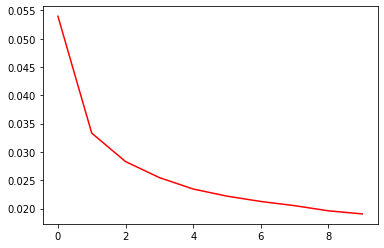

In [8]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot( history.history.get('loss') , color ='red')
plt.show()

In [9]:
model.summary()
for l in model.layers:
    print(l, len(l.get_weights()[0]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_14 (Dense)             (None, 784)               201488    
Total params: 1,083,808
Trainable params: 1,083,808
Non-trainable params: 0
_________________________________________________________________
<keras.layers.core.Dense object at 0x000001B6DD73E808> 784
<keras.layers.core.Dense object at 0x000001B6DE715A

784


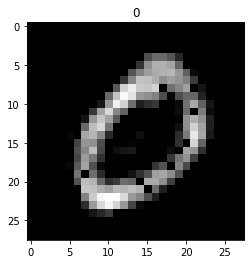

In [10]:
# 載入模型 
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import load_model
import matplotlib.pyplot as plt

sampel = 1
model = load_model('auto_en.h5')

test_sample = x_train[sampel].reshape(1,784)
print(len(test_sample[0]))

y_test_pred = model.predict(test_sample)

plt.imshow(y_test_pred.reshape(28,28), cmap='gray')
plt.title(y_train[sampel])
plt.show()

In [11]:
# 載入模型 
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('auto_en.h5')

test = x_train[1].reshape(1,784)

y_test_pred = model.predict(test)

# 該部分就是reshape(28, 28 )
inp_img = []
temp = []
for i in range(len(test[0])):
    if((i+1)%28 == 0):
        temp.append(test[0][i])
        inp_img.append(temp)
        temp = []
    else:
        temp.append(test[0][i])
out_img = []
temp = []
# 這邊就是predict 784 pixel --> 28 * 28
for i in range(len(y_test_pred[0])):
    if((i+1)%28 == 0):
        temp.append(y_test_pred[0][i])
        out_img.append(temp)
        temp = []
    else:
        temp.append(y_test_pred[0][i])
        
inp_img = np.array(inp_img)
out_img = np.array(out_img)


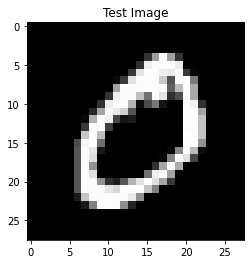

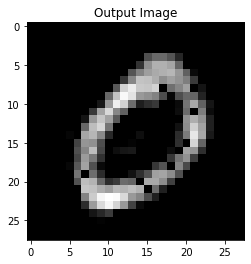

In [12]:
%matplotlib inline
plt.imshow(inp_img, cmap='gray')
plt.title('Test Image')
plt.show()
plt.imshow(out_img, cmap='gray')
plt.title('Output Image')
plt.show()

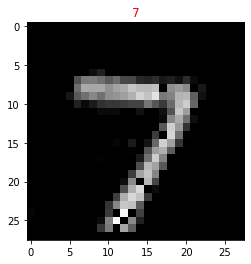

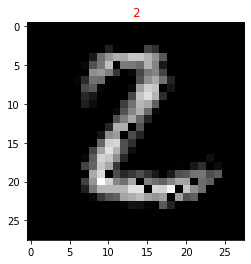

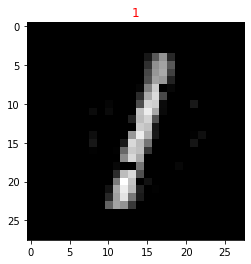

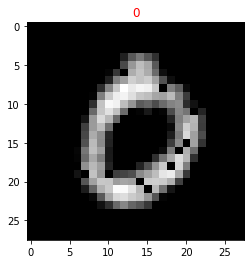

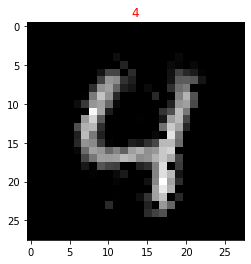

In [13]:
# 針對 x_test 前面五筆數據 進行decoder 使用肉眼去辨識
x_test[:5].shape ,y_test[:5].shape

from keras.models import load_model
import matplotlib.pyplot as plt

data = x_test[:5].reshape(5, 784)

model = load_model('auto_en.h5')
data_pred = model.predict(data).reshape(5, 28, 28)

for i in range(data_pred.shape[0]):
    plt.imshow(data_pred[i], cmap='gray')
    plt.title(y_test[i], color='red')
    plt.show()